# 1.- Arquitectura de aprendizaje a utilizar

## VGG16

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.  

**References**  
VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION
https://arxiv.org/pdf/1409.1556.pdf 

**Referencias de codigo**  
https://github.com/rasbt/stat453-deep-learning-ss21/blob/main/L14/1.1-vgg16.ipynb 

# 2.- Definición de la clase VGG16

VGG16(  
**(block_1): Sequential(**  
- (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (1): ReLU()  
- (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (3): ReLU()  
- (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1,   ceil_mode=False))  
**(block_2): Sequential(**  
- (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (1): ReLU()  
- (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (3): ReLU()  
- (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1,  ceil_mode=False))  
**(block_3): Sequential(**  
- (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (1): ReLU()  
- (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (3): ReLU()   
- (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (5): ReLU()  
- (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False))  
**(block_4): Sequential(**  
- (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 
- (1): ReLU()  
- (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (3): ReLU()  
- (4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))  
- (5): ReLU()  
- (6): Dropout(p=0.5, inplace=False)  
- (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1,  ceil_mode=False))  
**(block_5): Sequential(**  
- (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 
- (1): ReLU() 
- (2): Dropout(p=0.5, inplace=False) 
- (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 
- (4): ReLU() 
- (5): Dropout(p=0.5, inplace=False) 
- (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) 
- (7): ReLU() 
- (8): Dropout(p=0.5, inplace=False) 
- (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1,  ceil_mode=False) 
  )  
**(classifier): Sequential(**   
- (0): Linear(in_features=4608, out_features=4096, bias=True)  
- (1): Dropout(p=0.5, inplace=False)  
- (2): ReLU(inplace=True)  
- (3): Linear(in_features=4096, out_features=4096, bias=True)  
- (4): Dropout(p=0.5, inplace=False)  
- (5): ReLU(inplace=True)  
- (6): Linear(in_features=4096, out_features=10, bias=True)  
  ) 
  (avgpool): AdaptiveAvgPool2d(output_size=(3, 3)) ) 

## 3- Caracterización de los datos de entrada

Datos de simulacion de 2019, compartida por la colaboración HK-Canada

Varios conjuntos de dataset

- [x] Varying energy  
- [ ] Varying position  
- [ ] Varying everything  
  
  
### IWCD geometry with grid of 3" PMTs 
**Varying energy and direction** 
- e-, mu-, gamma, 1,000,000 events each 
- Evis between 20 MeV and 2 GeV 
- Centred position & vertical direction, varying direction around axis 

**Varying R position and direction**  
- e-, mu-, gamma, 1,000,000 events each 
- Fixed visible energy 200 MeV, fixed vertical direction 
- Varying radial position and direction aroung axis 

**Varying everything** 
- e-, mu-, gamma and pi0, 1,000,000 events each 
- Varying energy (20 MeV to 2 GeV), position (≥50cm from wall), direction (isotropic) 
  
---  
#### Cantidad de archivos a utilizar  
##### Archivos en formato HD5  
100,000 eventos por particula
---  
   
   

## Librerias a utilizar

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch, time
import iotools

In [2]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
#from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_cifar10, UnNormalize


In [3]:
# Revisar si existen rutas definidas en el pythonpath 
import os
os.environ['PYTHONPATH']


'/lustre/home/forozco/HKM/do_ML/ML_03/3_Scripts/iotools'

# Settings & Dataset


### Clases a utilizar

Numero de clases a utilizar en el entrenamiento:
- 0  gamma
- 1  electron
- 2  muon


### Formalizar el porque se utiliza ese tamaño de batch ???
    # Scripts CNN del articulo fue de 64,  ???


In [37]:
import torch.nn as nn

In [4]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 64
#BATCH_SIZE = 256
#NUM_EPOCHS = 50
NUM_EPOCHS = 15
DEVICE = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
#DEVICE = torch.device('cuda')     # Default CUDA device

set_all_seeds(RANDOM_SEED)

# Directorios de donde se toman los archivos HD5 para ser utilizados en el entrenamiento
#DATA_DIRS=['/home/cads/Documentos/making/Demos_H5/H5_varyR']
DATA_DIRS=['/lustre/home/forozco/HKM/do_ML/ML_03/3_Scripts/']

# Directorios donde van a ser mandados los logs del entrenamiento
DATA_LOGS='/lustre/home/forozco/HKM/do_ML/ML_03/3_Scripts/'

# Nombre del archivo LOG del entrenamiento
LOG_FILE_TRAIN='log_train.csv'
# Nombre del archivo LOG del validacion
LOG_FILE_VAL='log_valid.csv'
# Nombre del archivo LOG del validacion
LOG_FILE_TEST='log_test.csv'



# Dataset HK - Data 2019 - create data loader

In [5]:

from iotools import loader_factory

# for train
#train_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.0, use_fraction=0.2)
# for test
#valid_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.1, use_fraction=0.1)
# for validation
#test_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.1, use_fraction=0.1)

# for train
train_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.0, use_fraction=0.02)
# for test
valid_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.1, use_fraction=0.01)
# for validation
test_loader=loader_factory('H5Dataset', batch_size=BATCH_SIZE, shuffle=True, num_workers=0, data_dirs=DATA_DIRS, flavour='100k.h5', start_fraction=0.1, use_fraction=0.01)


# Checking the dataset
for images, labels, C1, C2 in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Image Canal 1 :', C1.shape)
    print('Image Canal 2 :', C2.shape)
    print('Class labels of 10 examples:', labels[:10])
    break
print(len(train_loader))




Image batch dimensions: (64, 88, 168, 2)
Image label dimensions: (64,)
Image Canal 1 : (64,)
Image Canal 2 : (64,)
Class labels of 10 examples: [1. 1. 2. 2. 2. 0. 1. 0. 2. 2.]
94


In [6]:
# Decorative progress bar
def progress_bar(count, total, message=''):
    """
    Args: count .... int/float, current progress counter
          total .... int/float, total counter
          message .. string, appended after the progress bar
    """
    from IPython.display import HTML, display,clear_output
    return HTML("""
        <progress 
            value='{count}'
            max='{total}',
            style='width: 30%'
        >
            {count}
        </progress> {frac}% {message}
    """.format(count=count,total=total,frac=int(float(count)/float(total)*100.),message=message))


In [7]:
# Dumb class to organize output csv file
class CSVData:

    def __init__(self,fout):
        self.name  = fout
        self._fout = None
        self._str  = None
        self._dict = {}

    def record(self, keys, vals):
        for i, key in enumerate(keys):
            self._dict[key] = vals[i]

    def write(self):
        if self._str is None:
            self._fout=open(self.name,'w')
            self._str=''
            for i,key in enumerate(self._dict.keys()):
                if i:
                    self._fout.write(',')
                    self._str += ','
                self._fout.write(key)
                self._str+='{:f}'
            self._fout.write('\n')
            self._str+='\n'

        self._fout.write(self._str.format(*(self._dict.values())))

    def flush(self):
        if self._fout: self._fout.flush()

    def close(self):
        if self._str is not None:
            self._fout.close()


In [8]:

# Alta de archivos LOGS a utilizar
train_log, test_log, valid_log = CSVData(DATA_LOGS + LOG_FILE_TRAIN), CSVData(DATA_LOGS + LOG_FILE_TEST) , CSVData(DATA_LOGS + LOG_FILE_VAL)




# Definicion del modelo VGG 16

In [9]:
##########################
### MODEL
##########################


class VGG16(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        
        self.block_1 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=2,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=64,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_2 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=64,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=128,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_3 = torch.nn.Sequential(        
                torch.nn.Conv2d(in_channels=128,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
          
        self.block_4 = torch.nn.Sequential(   
                torch.nn.Conv2d(in_channels=256,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),        
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )
        
        self.block_5 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),            
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),    
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))             
        )
            
        height, width = 3, 3 ## you may want to change that depending on the input image size
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512*height*width, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(True),
            torch.nn.Linear(4096, num_classes),
        )
            
        for m in self.modules():
            if isinstance(m, torch.torch.nn.Conv2d) or isinstance(m, torch.torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()
                    
        self.avgpool = torch.nn.AdaptiveAvgPool2d((height, width))
        
        
    def forward(self, x):

        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        x = self.avgpool(x)
#        x = x.view(x.size(0), -1) # flatten
        x = x.reshape(x.size(0), -1) # flatten
        
        logits = self.classifier(x)
        #probas = F.softmax(logits, dim=1)

        return logits 

# Funcion para  entrenar el modelo

# Entrenando el modelo

In [10]:
model = VGG16(num_classes=3)


model = model.to(DEVICE)

# checar la definicion de la funcion de perdida, loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)


In [11]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i,data in enumerate(data_loader):
            # Data and label
            features = torch.FloatTensor(data[0])
            targets = torch.LongTensor(data[1])
                                  
            features = features.permute(0,3,1,2)
            features = features.to(DEVICE)
            targets = targets.to(DEVICE)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
        
    return correct_pred.float()/num_examples * 100


In [12]:
print('train period')

# Define train period. "epoch" = N image consumption where N is the total number of train samples.
#TRAIN_EPOCH=NUM_EPOCHS
TRAIN_EPOCH=3.0
# Set the network to training mode
#blob.net.train()

logging_interval=100
model.train()
epoch=0
iteration=0
start_time = time.time()
minibatch_loss_list, train_acc_list, valid_acc_list = [], [], []

while int(epoch+0.5) < TRAIN_EPOCH:
    print('Epoch',int(epoch+0.5),'Starting @',time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()))
    # Create a progress bar for this epoch
    ### from utils import progress_bar
    progress = display(progress_bar(0,len(train_loader)),display_id=True)
    # Loop over data samples and into the network forward function    
    for i,data in enumerate(train_loader):
        # Data and label
        features = torch.FloatTensor(data[0])
        targets = torch.LongTensor(data[1])
                                  
        features = features.permute(0,3,1,2)
        features = features.to(DEVICE)
        targets = targets.to(DEVICE)
        
        # ## FORWARD AND BACK PROP
        #print('features train ')
        #print(features.shape)
        logits = model(features)
        
        
#        print('logits.shape')
#        print(logits.shape)
#        print('targets - labels')
#        print(targets.shape)
 
    ##  Verificar si esta FUNCION de perdida es la mas apropiada o si
        ##  le hace falta algun otro paramtro,  por ejemplo creo que falta definir el optimizador ADAM
        ##  Verificar en https://stackoverflow.com/questions/33962226/common-causes-of-nans-during-training-of-neural-networks
        ##  https://sisyphus.gitbook.io/project/deep-learning-basics/deep-learning-debug/common-causes-of-nans-during-training
        
        
        loss = torch.nn.functional.cross_entropy(logits, targets)
        #print ('loss: ', loss)

        loss.backward()
        #print(loss)
        #print(len(train_loader))

        # ## UPDATE MODEL PARAMETERS
        optimizer.step()        
        #print(i)
    
        # Epoch update
        epoch += 1./len(train_loader)
        iteration += 1
        
        # ## LOGGING
        
        minibatch_loss_list.append(loss.item())
        if not i % logging_interval:
           print(f'Epoch: {epoch+1:03f}/{NUM_EPOCHS:03f} '
                 f'| Batch: {i:04d}/{len(train_loader):04d} '
                 f'| Loss: {loss:.4f}')
        
        # more rarely, run validation
#        if (i+1)%100 == 0:
        if (i+1)%100 == 0:
            with torch.no_grad():
                model.eval()
                #test_data = next(iter(test_loader))
                #data,label = test_data[0:2]
##                -----
##                res = forward(model,False)
##                -----

####  Se adiciona
#              data = torch.FloatTensor(test_data[0])
#                label = torch.LongTensor(test_data[1])
#                                  
#                data = data.permute(0,3,1,2)
#                data = data.to(DEVICE)
#                label = label.to(DEVICE)

#                print('features test ')
#                print(data.shape)
#                res = model(data)
#                print('features res ')
#                print(res.shape)
#                print(res)
    
####  termina adiciona
    
                train_acc = compute_accuracy(model, train_loader, device=DEVICE)
                valid_acc = compute_accuracy(model, valid_loader, device=DEVICE)
                print(f'Epoch: {epoch+1:03f}/{NUM_EPOCHS:03f} '
                      f'| Train: {train_acc :.2f}% '
                      f'| Validation: {valid_acc :.2f}%')
                train_acc_list.append(train_acc.item())
                valid_acc_list.append(valid_acc.item())
        
    
                test_log.record(['iteration','epoch','accuracy','loss'],[iteration,epoch,train_acc,loss])
                test_log.write()
                
                elapsed = (time.time() - start_time)/60
                print(f'Time elapsed: {elapsed:.2f} min')
        
        if epoch >= TRAIN_EPOCH:  
            break
        
        #
        # Log/Report
        #
        # Record the current performance on train set
        #train_log.record(['iteration','epoch','accuracy','loss'],[iteration,epoch,res['accuracy'],res['loss']])
        #train_log.write()    
#
    #epoch += 1
#
    message = '... Iteration %d ... Epoch %1.2f ... Loss %1.3f ... Accuracy %1.3f' % (iteration,epoch,loss,loss)
    progress.update(progress_bar((i+1),len(train_loader),message))

test_log.close()
train_log.close()

train period
Epoch 0 Starting @ 2022-05-10 10:46:15


Epoch: 1.010638/15.000000 | Batch: 0000/0094 | Loss: 139.7810
Epoch 1 Starting @ 2022-05-10 10:54:38


Epoch: 2.010638/15.000000 | Batch: 0000/0094 | Loss: 5.8598
Epoch 2 Starting @ 2022-05-10 11:02:01


Epoch: 3.010638/15.000000 | Batch: 0000/0094 | Loss: 262.5753


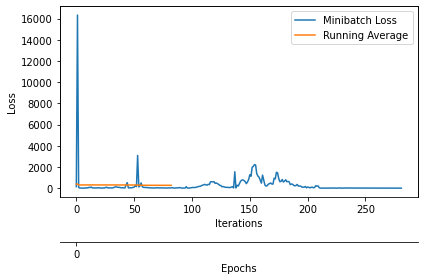

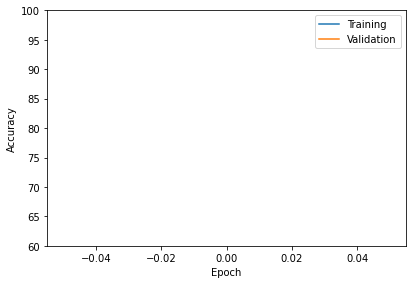

In [13]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

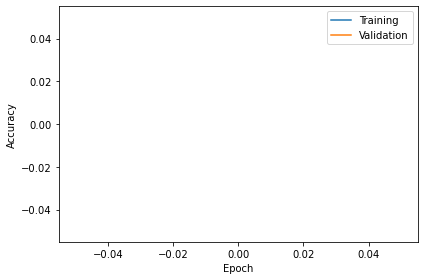

In [14]:

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
#plt.ylim([60, 100])
plt.show()

## Performance Analysis  
Beyond looking at the performance of the network, we can analyze how the network is performing for each classification target. Let's first obtain a high-statistics analysis output by running the network on all test samples.

In [57]:
def inference(model,data_loader):
    label,prediction,accuracy=[],[],[]
    label_l,prediction_l,accuracy_l=[],[],[]
    # set the network to test (non-train) mode
    model.eval()
    # create the result holder
    index,label,prediction = [],[],[]
    for i,datac in enumerate(data_loader):
#        data, label = data[0:2]
##
  
        data = torch.FloatTensor(datac[0])
        label = torch.LongTensor(datac[1])
                                  
        data = data.permute(0,3,1,2)
        data = data.to(DEVICE)
        label = label.to(DEVICE)
        
        # ## FORWARD AND BACK PROP
        #print('features train ')
        #print(features.shape)
        prediction = model(data)
        
        if label is not None:
            label = torch.as_tensor(label).type(torch.LongTensor).cpu()#[torch.as_tensor(l).cuda() for l in blob.label]
            label.requires_grad = False
            loss = torch.nn.functional.cross_entropy(prediction,label)
        loss = loss        
        
        prediction = torch.argmax(prediction,dim=-1)
        accuracy   = (prediction == label).sum().item() / float(prediction.nelement())        
        prediction = prediction.cpu().detach().numpy()

#        res = model(forward(blob,True)                   
                    
        accuracy_l.append(accuracy)
        prediction_l.append(prediction)
        label_l.append(label)
    # report accuracy
    accuracy_l   = np.array(accuracy_l,dtype=np.float32)    
    label_l      = np.hstack(label_l)
    
    prediction_l = np.hstack(prediction_l)
    
    return accuracy_l, label_l, prediction_l

In [58]:
# Plot a confusion matrix
def plot_confusion_matrix(label,prediction,class_names):
    """
    Args: label ... 1D array of true label value, the length = sample size
          prediction ... 1D array of predictions, the length = sample size
          class_names ... 1D array of string label for classification targets, the length = number of categories
    """
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12,8),facecolor='w')
    num_labels = len(class_names)
    max_value  = np.max([np.max(np.unique(label)),np.max(np.unique(label))])
    assert max_value < num_labels
    mat,_,_,im = ax.hist2d(label,prediction,
                           bins=(num_labels,num_labels),
                           range=((-0.5,num_labels-0.5),(-0.5,num_labels-0.5)),cmap=plt.cm.Blues)
    plt.colorbar(im, ax=ax)
    ax.set_xticks(np.arange(num_labels))
    ax.set_yticks(np.arange(num_labels))
    ax.set_xticklabels(class_names,fontsize=16)
    ax.set_yticklabels(class_names,fontsize=16)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax.set_xlabel('Prediction',fontsize=20)
    ax.set_ylabel('True Label',fontsize=20)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            ax.text(i,j, str(mat[i, j]),
                    ha="center", va="center", fontsize=16,
                    color="white" if mat[i,j] > (0.5*mat.max()) else "black")
    fig.tight_layout()
    plt.show()

plot_confusion_matrix
Accuracy mean 0.33344415 std 0.07636152


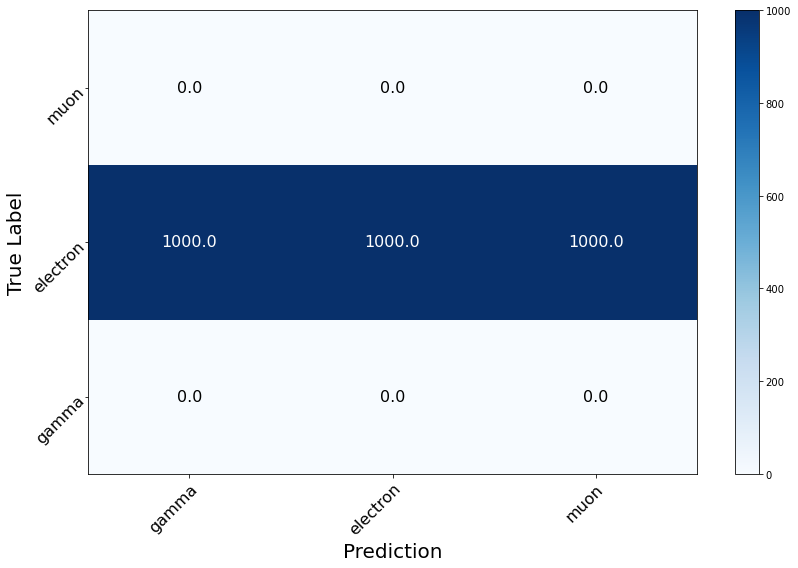

In [59]:
print('plot_confusion_matrix')

#from utils import plot_confusion_matrix
accuracy,label,prediction = inference(model,test_loader)
print('Accuracy mean',accuracy.mean(),'std',accuracy.std())
plot_confusion_matrix(label,prediction,['gamma','electron','muon'])